# SVM


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import os
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import pickle

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [102]:
Categories=['ر','ذ','أ','ب','ت','ث','ج','ح','خ','د']

print("Enter How Many types of Images do you want to classify")
n=int(input());
Categories=[]
print(f'please enter {n} names')
for i in range(n):
  name=input()
  Categories.append(name)
print(f"If not drive Please upload all the {n} category images in google collab with the same names" )

Enter How Many types of Images do you want to classify
10
please enter 10 names
أ
ب
ت
ث
ج
ح
خ
د
ذ
ر
If not drive Please upload all the 10 category images in google collab with the same names


In [103]:
flat_data_arr=[]
target_arr=[]
#please use datadir='/content' if the files are upload on to google collab
#else mount the drive and give path of the parent-،folder containing all category images folders.
datadir='/content/drive/MyDrive/dataset'
for i in Categories:
  print(f'loading... category : {i}')
  path=os.path.join(datadir,i)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized=resize(img_array,(150,150,3))
    flat_data_arr.append(img_resized.flatten())
    target_arr.append(Categories.index(i))
  print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data)
df['Target']=target
df

loading... category : أ
loaded category:أ successfully
loading... category : ب
loaded category:ب successfully
loading... category : ت
loaded category:ت successfully
loading... category : ث
loaded category:ث successfully
loading... category : ج
loaded category:ج successfully
loading... category : ح
loaded category:ح successfully
loading... category : خ
loaded category:خ successfully
loading... category : د
loaded category:د successfully
loading... category : ذ
loaded category:ذ successfully
loading... category : ر
loaded category:ر successfully


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,67461,67462,67463,67464,67465,67466,67467,67468,67469,67470,67471,67472,67473,67474,67475,67476,67477,67478,67479,67480,67481,67482,67483,67484,67485,67486,67487,67488,67489,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0
1,0.537255,0.501961,0.482353,0.537255,0.501961,0.482353,0.534902,0.499608,0.480000,0.531861,0.496567,0.476959,0.528889,0.493595,0.473987,0.525996,0.490702,0.471094,0.525513,0.490219,0.470611,0.522353,0.487059,0.467451,0.521569,0.486275,0.466667,0.525333,0.490039,0.470431,0.529596,0.494302,0.474694,0.530522,0.495228,0.475620,0.533333,0.498039,0.478431,0.536627,...,0.458824,0.411190,0.365856,0.458824,0.405084,0.368184,0.456157,0.400864,0.366352,0.454902,0.397685,0.367021,0.457725,0.395871,0.369042,0.460392,0.392481,0.368763,0.450980,0.380392,0.364706,0.450980,0.380392,0.364706,0.456627,0.380392,0.373176,0.458824,0.380392,0.376471,0.458824,0.380392,0.379148,0.459765,0.381333,0.384381,0.462431,0.384000,0.387830,0
2,0.925490,0.925490,0.925490,0.925490,0.925490,0.925490,0.925490,0.925490,0.925490,0.925617,0.925617,0.925617,0.927009,0.927009,0.927009,0.928401,0.928401,0.928401,0.928927,0.928927,0.928927,0.929260,0.929260,0.929260,0.929412,0.929412,0.929412,0.929412,0.929412,0.929412,0.929791,0.929791,0.929791,0.931183,0.931183,0.931183,0.932575,0.932575,0.932575,0.932575,...,0.516889,0.516889,0.516889,0.482713,0.482713,0.482713,0.448536,0.448536,0.448536,0.457027,0.457027,0.457027,0.481517,0.481517,0.481517,0.504136,0.504136,0.504136,0.524508,0.524508,0.524508,0.548645,0.548645,0.548645,0.589723,0.589723,0.589723,0.630802,0.630802,0.630802,0.776978,0.776978,0.776978,0.933664,0.933664,0.933664,0.890931,0.890931,0.890931,0
3,0.643137,0.647059,0.662745,0.639216,0.647059,0.662745,0.639216,0.650980,0.662745,0.639216,0.654902,0.666667,0.640742,0.656429,0.666667,0.641393,0.657079,0.668575,0.639343,0.655029,0.666794,0.647059,0.652889,0.668575,0.648967,0.648840,0.664526,0.644791,0.647059,0.658301,0.643137,0.647059,0.654118,0.643646,0.650980,0.647568,0.645717,0.651617,0.654196,0.648204,...,0.592793,0.586893,0.588235,0.589281,0.582837,0.578562,0.581176,0.575728,0.575686,0.584314,0.583791,0.583791,0.588235,0.588235,0.588235,0.588235,0.590144,0.588235,0.586095,0.588235,0.588235,0.584314,0.588235,0.588235,0.584314,0.588617,0.588235,0.584314,0.586222,0.584314,0.584314,0.584314,0.584314,0.588235,0.587027,0.588235,0.590065,0.589126,0.590065,0
4,0.643137,0.647059,0.662745,0.639216,0.647059,0.662745,0.639216,0.650980,0.662745,0.639216,0.654902,0.666667,0.640742,0.656429,0.666667,0.641393,0.657079,0.668575,0.639343,0.655029,0.666794,0.647059,0.652889,0.668575,0.648967,0.648840,0.664526,0.644791,0.647059,0.658301,0.643137,0.647059,0.654118,0.643646,0.650980,0.647568,0.645717,0.651617,0.654196,0.648204,...,0.592793,0.586893,0.588235,0.589281,0.582837,0.578562,0.581176,0.575728,0.575686,0.584314,0.583791,0.583791,0.588235,0.588235,0.588235,0.588235,0.590144,0.588235,0.586095,0.588235,0.588235,0.584314,0.588235,0.588235,0.584314,0.588617,0.588235,0.584314,0.586222,0.584314,0.584314,0.584314,0.584314,0.588235,0.587027,0.588235,0.590065,0.589126,0.590065,0
...,...,...,...,...,...,...,...,...,...,...,...,.

In [104]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Splitted Successfully')

Splitted Successfully


In [107]:
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)
print("The training of the model is started, please wait for while as it may take few minutes to complete")
model=GridSearchCV(svc,param_grid)
model.fit(x_train,y_train)
print('The Model is trained well with the given images')
model.best_params_

The training of the model is started, please wait for while as it may take few minutes to complete
The Model is trained well with the given images


{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

In [108]:
y_pred=model.predict(x_test)
print("The predicted Data is :")
y_pred

The predicted Data is :


array([1, 8, 2, 2, 6, 3, 9, 3, 5, 1, 7, 7, 2, 9, 9, 5, 6, 1, 1, 4, 2, 4,
       6])

In [109]:
print("The actual data is:")
np.array(y_test)

The actual data is:


array([1, 8, 2, 2, 6, 3, 9, 3, 5, 1, 7, 7, 0, 8, 9, 5, 6, 1, 0, 4, 2, 4,
       6])

In [110]:
#classification_report(y_pred,y_test)
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")
#confusion_matrix(y_pred,y_test)

The model is 86.95652173913044% accurate


In [111]:
pickle.dump(model,open('img_model.p','wb'))
print("Pickle is dumped successfully")

Pickle is dumped successfully


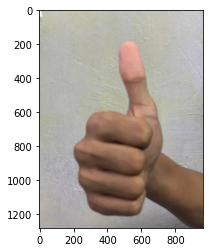

أ = 35.506087006251704%
ب = 14.672015324451868%
ت = 7.698758889317276%
ث = 5.457635894232991%
ج = 3.335041518796147%
ح = 2.2798540530622025%
خ = 4.6371172742590625%
د = 7.547006050721734%
ذ = 7.839841136049462%
ر = 11.026642852857496%
The predicted image is : أ
Is the image a أ ?(y/n)
y
Thank you for your feedback


In [113]:
#print(os.path.abspath(os.getcwd()))
model=pickle.load(open('img_model.p','rb'))

# /content/drive/MyDrive/faceShape/Test/heart (161).jpg
# 
img=imread("/content/drive/MyDrive/test/أ.jpg")
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
  print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])
print(f'Is the image a {Categories[model.predict(l)[0]]} ?(y/n)')
while(True):
  b=input()
  if(b=="y" or b=="n"):
    break
  print("please enter either y or n")

if(b=='n'):
  print("What is the image?")
  for i in range(len(Categories)):
    print(f"Enter {i} for {Categories[i]}")
  k=int(input())
  while(k<0 or k>=len(Categories)):
    print(f"Please enter a valid number between 0-{len(Categories)-1}")
    k=int(input())
  print("Please wait for a while for the model to learn from this image :)")
  flat_arr=flat_data_arr.copy()
  tar_arr=target_arr.copy()
  tar_arr.append(k)
  flat_arr.extend(l)
  tar_arr=np.array(tar_arr)
  flat_df=np.array(flat_arr)
  df1=pd.DataFrame(flat_df)
  df1['Target']=tar_arr
  model1=GridSearchCV(svc,param_grid)
  x1=df1.iloc[:,:-1]
  y1=df1.iloc[:,-1]
  x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.20,random_state=77,stratify=y1)
  d={}
  for i in model.best_params_:
    d[i]=[model.best_params_[i]]
  model1=GridSearchCV(svc,d)
  model1.fit(x_train1,y_train1)
  y_pred1=model.predict(x_test1)
  print(f"The model is now {accuracy_score(y_pred1,y_test1)*100}% accurate")
  pickle.dump(model1,open('img_model.p','wb'))
print("Thank you for your feedback")